In [1]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
x,y = make_classification(n_samples = 10000, n_classes= 2, n_features = 2, n_informative = 2, 
                          n_redundant= 0, n_clusters_per_class= 1, random_state = 60);

#print(type(x));print(y)

df = pd.DataFrame(data= x, columns = ['f1', 'f2'])
df['class'] = y
print(df.shape)
df.head(7)

(10000, 3)


,f1,f2,class
0,0.994448,-1.516667,0
1,-0.340479,-0.395461,1
2,-0.929780,-1.448549,1
3,1.726444,-2.539542,0
4,-1.956264,-1.538624,1
5,0.747555,-0.211740,0
6,-1.228424,-1.218711,1


In [3]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.85)
x_test

,f1,f2
4259,-1.181279,-1.226115
7702,-0.484871,-0.483827
8550,1.243530,-1.071963
4466,-1.675476,-1.375246
3195,-2.171220,-2.061962
...,...,...
8371,-0.105077,-0.156773
7387,1.517427,-0.741815
1841,1.101556,-0.187951
6731,-0.530719,-0.574776


In [4]:
print("Shape of Training dataset",x_train.shape);print(y_train.shape)
print("shape of Test dataset", x_test.shape);print(y_test.shape)

Shape of Training dataset (8500, 2)
(8500,)
shape of Test dataset (1500, 2)
(1500,)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings(action = 'ignore')

plt.figure(figsize = (8,6), facecolor= 'turquoise')
plt.title("Feature1 Vs. Feature2")
sb.scatterplot(x = df['f1'], y = df['f2'], hue = df['class'], palette = ['Red', 'Green'])
sb.set_style("darkgrid")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 800x600 with 1 Axes>

In [6]:

def RandomSearchCV(x_train, y_train, folds, classifier, param_range):
    #hyperparameters = [int(i) for i in (np.random.uniform(1, param_range, 10))]
    print("All Hyperparameters: ", param_range)
    train_groups = grouping_data(x_train, folds)
    #print(train_groups)
    all_train_idx = set([i for i in range(0, len(x_train))])   
    all_cv_accuracy = []
    all_train_accuracy = []
    
    for k in hyperparameters:
        fold_test_accuracy = []
        fold_train_accuracy = []

        for group in train_groups:
                        
            new_x_train = x_train[list(group)]
            new_y_train = y_train[list(group)]
            new_x_test = x_train[list(all_train_idx - group)]
            new_y_test = y_train[list(all_train_idx - group)]
            
            classifier.n_neighbors = k
            classifier.fit(new_x_train, new_y_train)
            
            y_train_prediction = classifier.predict(new_x_train)
            fold_train_accuracy.append(accuracy_score(new_y_train, y_train_prediction))
            
            y_test_prediction = classifier.predict(new_x_test)
            fold_test_accuracy.append(accuracy_score(new_y_test, y_test_prediction))
            
            
        all_cv_accuracy.append(np.mean(np.array(fold_test_accuracy)))
        all_train_accuracy.append(np.mean(np.array(fold_train_accuracy)))
        
        
    return all_cv_accuracy, all_train_accuracy


        
def grouping_data(x_train, folds):
    """
    Let's suppose we divide the Dtrain into D1, D2, D3.
    This function written here will ultimately form a list of sets and these sets is formed
    of the indices to be used while grouping. Grouping here is the rotation where one out of D1,D2,D3 will
    form a test data and rest two will form Training data in the cross validation stage. 
    
    """
    
    train_group_idx = []   # list of sets
   
    indices = []
    data_per_grp = int(len(x_train)/folds)    # 2833 dpts per group we need when folds = 3
    #print(len(x_train))

    i = 0
    start_idx = 0
    end_idx = data_per_grp
    while i < folds:
        indices.append([i for i in range(start_idx, end_idx)])
        start_idx = end_idx
        end_idx = start_idx + data_per_grp
            
        i+= 1
            
    for j in range(0,len(indices)-1):
        if j < len(indices)-1:
            train_group_idx.append(set(indices[j]).union(set(indices[j+1])))
      
             
    train_group_idx.append(set(indices[0]).union(set(indices[-1])))
                
            
    return train_group_idx 

In [7]:
param_range = 50
hyperparameters = [int(i) for i in (np.random.uniform(1, param_range, 10))]
folds = 5

clf = KNeighborsClassifier()
x_train = np.array(x_train)
y_train = np.array(y_train)

test_score, train_score = RandomSearchCV(x_train, y_train, folds, clf, hyperparameters)
print("Training Scores: \n",train_score);print("\n")
print("Test Scores: \n",test_score)

All Hyperparameters:  [11, 14, 42, 15, 10, 32, 12, 8, 41, 39]
Training Scores: 
 [0.9611176470588235, 0.9610588235294119, 0.960235294117647, 0.9605882352941176, 0.9617058823529412, 0.9605882352941176, 0.9615882352941176, 0.9621764705882352, 0.9605882352941176, 0.9603529411764706]


Test Scores: 
 [0.9582745098039215, 0.9590196078431372, 0.96, 0.9586274509803921, 0.9585098039215685, 0.959764705882353, 0.9584313725490196, 0.9579607843137256, 0.9599215686274508, 0.9600392156862746]


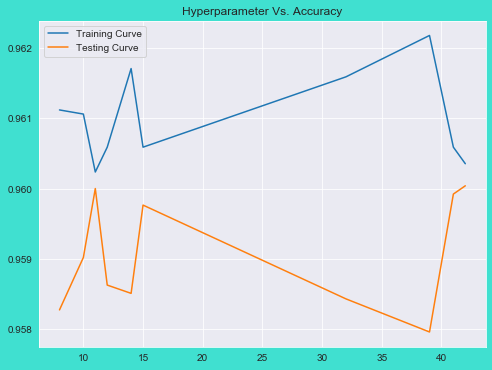

In [8]:
plt.figure(figsize = (8,6), facecolor = 'turquoise')
sb.set_style("darkgrid")
plt.plot(sorted(hyperparameters), train_score, label = "Training Curve")
plt.plot(sorted(hyperparameters), test_score, label = "Testing Curve")
plt.legend()
plt.title("Hyperparameter Vs. Accuracy")
plt.show()

In [9]:
error_diff = []
for i in range(0, len(hyperparameters)):
    error_diff.append(train_score[i] - test_score[i])

optimal_k = hyperparameters[np.argsort(error_diff)[0]]
print("Best K value is: ", optimal_k)

Best K value is:  42


In [10]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

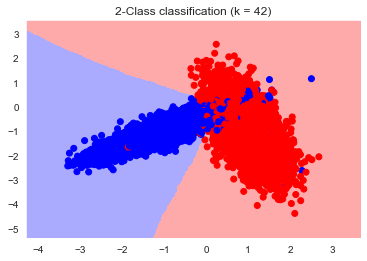

In [11]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = optimal_k)
neigh.fit(x_train, y_train)
plot_decision_boundary(x_train[:, 0], x_train[:, 1], y_train, neigh)

### Confirming the best parameter (K) value using scikit learn library

In [12]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': hyperparameters}
clf = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = 5)
clf.fit(x_train, y_train)
clf.best_params_

{'n_neighbors': 42}